In [6]:
import numpy as np
m1 = 0.27898038
m2 = 0.12122940
m3 = 0.07364677

# print(m2-m1**2,m3-m1**3,m3-m2**(3/2))
# print(m1*m3-m2**2)

mu=m1
sigma=np.sqrt(m2-m1**2)
gamma1=(m3-3*mu*sigma**2-mu**3)/(sigma**3)
print(sigma,gamma1)

0.2083251006841365 1.7266578332065654


In [69]:
import numpy as np
from math import isfinite
from scipy.optimize import least_squares

# Given moments
m1 = 0.28103088
m2 = 0.10052531
m3 = 0.07982179

m1 = 0.27898038; m1e=0.00514371
m2 = 0.12122940; m2e=0.001063
m3 = 0.07364677; m3e=0.00534999

def rising_factorial(x, n):
    """Compute (x)_n = x(x+1)...(x+n-1)."""
    result = 1.0
    for i in range(n):
        result *= (x + i)
    return result

def model_m(n, a, b, g):
    """Moment formula given parameters (a=alpha, b=beta, g=gamma)."""
    C = 2 + a + b
    D = 1 + a
    num_rf = rising_factorial(a + 1, n)
    den_rf = rising_factorial(C + 1, n)
    return (num_rf / den_rf) * (C + n + (D + n) * g) / (C + D * g)

def residuals(params):
    a, b, g = params
    return [
        (model_m(1, a, b, g) - m1)/m1e,
        (model_m(2, a, b, g) - m2)/m2e,
        (model_m(3, a, b, g) - m3)/m3e
    ]

# Multiple initial guesses to improve robustness
inits = [
    (1.0, 1.0, 0.5),
    (0.5, 0.5, 0.2),
    (2.0, 0.5, 0.1),
    (0.1, 0.1, 0.1),
    (5.0, 1.0, 0.9),
    (0.5, 1.0, 0.2),
    # (0.049957, 1.129440, -0.766358)
]

solutions = []
for init in inits:
    try:
        res = least_squares(residuals, init,
                            bounds=([0, 0, -10], [10, 10, 10]))
        if res.success and all(isfinite(v) for v in res.x):
            cost = res.cost
            a, b, g = res.x
            solutions.append((cost, a, b, g))
    except Exception:
        pass

# Sort by residual cost
solutions.sort(key=lambda s: s[0])

# Best solution
best = solutions[0]
cost, alpha, beta, gamma = best

print("Best fit parameters:")
print(f"  alpha ≈ {alpha:.6f}")
print(f"  beta  ≈ {beta:.6f}")
print(f"  gamma ≈ {gamma:.6f}")
print("\nCheck predicted moments:")
print(f"  m1_pred = {model_m(1, alpha, beta, gamma):.8f}")
print(f"  m2_pred = {model_m(2, alpha, beta, gamma):.8f}")
print(f"  m3_pred = {model_m(3, alpha, beta, gamma):.8f}")
print("\nResidual cost =", cost*2)

# t=residuals([0.08,1.1294398277512971,-0.7663579386358672])
# print(t+np.array([m1,m2,m3]))
alpha=-0.019216737196512273
beta=1.7443203291773324
gamma=0.4249829410253897
t=residuals([alpha,beta,gamma])
np.sum(np.array(t)**2)


Best fit parameters:
  alpha ≈ 0.000000
  beta  ≈ 0.990587
  gamma ≈ -0.765912

Check predicted moments:
  m1_pred = 0.27695755
  m2_pred = 0.12155901
  m3_pred = 0.06616682

Residual cost = 2.2055489936225


np.float64(2.8067050844265586)

In [25]:
import numpy as np
from math import isfinite
from scipy.optimize import least_squares

# Given moments
m1 = 0.27898038; m1e=0.00514371
m2 = 0.12122940; m2e=0.001063
m3 = 0.07364677; m3e=0.00534999

def rising_factorial(x, n):
    """Compute (x)_n = x(x+1)...(x+n-1)."""
    result = 1.0
    for i in range(n):
        result *= (x + i)
    return result

def model_m(n, a, b, g):
    """Moment formula given parameters (a=alpha, b=beta, g=gamma)."""
    C = 2 + a + b
    D = 1 + a
    num_rf = rising_factorial(a + 1, n)
    den_rf = rising_factorial(C + 1, n)
    return (num_rf / den_rf) * (C + n + (D + n) * g) / (C + D * g)

def residuals(params):
    a, b = params
    return [
        # (model_m(1, a, b, 0) - m1)/m1e,
        (model_m(2, a, b, 0) - m2)/m2e,
        (model_m(3, a, b, 0) - m3)/m3e
    ]

# Multiple initial guesses to improve robustness
inits = [
    (1.0, 1.0),
    (0.5, 0.5),
    (2.0, 0.5),
    (0.1, 0.1),
    (5.0, 1.0),
    (0.5, 1.0),
]

solutions = []
for init in inits:
    try:
        res = least_squares(residuals, init,
                            bounds=([0,0], [10,10]))
        if res.success and all(isfinite(v) for v in res.x):
            cost = res.cost
            a, b = res.x
            solutions.append((cost, a, b))
    except Exception:
        pass


# Sort by residual cost
solutions.sort(key=lambda s: s[0])

# Best solution
best = solutions[0]
cost, alpha, beta = best

print("Best fit parameters:")
print(f"  alpha ≈ {alpha:.6f}")
print(f"  beta  ≈ {beta:.6f}")
print(f"  gamma ≈ {gamma:.6f}")
print("\nCheck predicted moments:")
print(f"  m1_pred = {model_m(1, alpha, beta, gamma):.8f}")
print(f"  m2_pred = {model_m(2, alpha, beta, gamma):.8f}")
print(f"  m3_pred = {model_m(3, alpha, beta, gamma):.8f}")
print("\nResidual cost =", cost*2)

# t=residuals([0.08,1.1294398277512971,-0.7663579386358672])
# print(t+np.array([m1,m2,m3]))
t=residuals([alpha,beta])
np.sum(np.array(t)**2)


Best fit parameters:
  alpha ≈ 0.000000
  beta  ≈ 1.588351
  gamma ≈ -0.773528

Check predicted moments:
  m1_pred = 0.23547827
  m2_pred = 0.09055026
  m3_pred = 0.04408956

Residual cost = 2.539028187749124


np.float64(2.539028187749124)

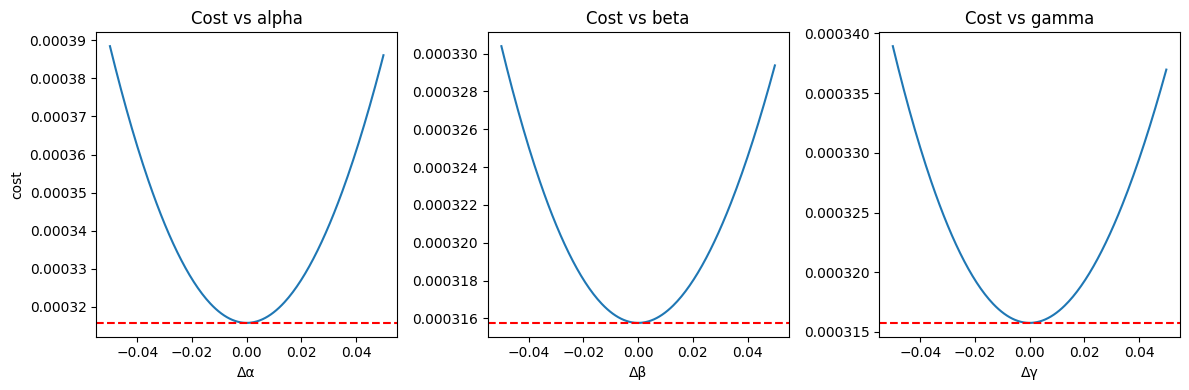

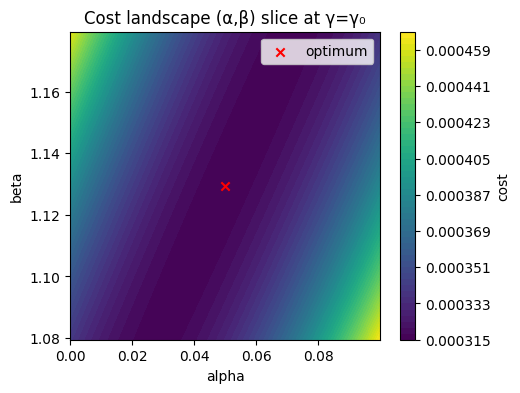

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Best-fit solution (from earlier)
alpha0, beta0, gamma0 = 0.0499565008, 1.1294398278, -0.7663579386

# Define cost function
def rf(x,n):
    r = 1.0
    for i in range(n):
        r *= (x + i)
    return r

def model_m(n,a,b,g):
    C = 2.0 + a + b
    D = 1.0 + a
    num = rf(a+1.0, n)
    den = rf(C+1.0, n)
    denom_linear = (C + D * g)
    if abs(denom_linear) < 1e-16:
        return 1e9
    return (num/den) * (C + n + (D + n) * g) / denom_linear

m_targets = [0.28103088, 0.10052531, 0.07982179]


def cost(a,b,g):
    preds = [model_m(n,a,b,g) for n in (1,2,3)]
    res = np.array(preds) - np.array(m_targets)
    return 0.5*np.dot(res,res)

# 1D slices around optimum
deltas = np.linspace(-0.05, 0.05, 200)
cost_alpha = [cost(alpha0+d, beta0, gamma0) for d in deltas]
cost_beta  = [cost(alpha0, beta0+d, gamma0) for d in deltas]
cost_gamma = [cost(alpha0, beta0, gamma0+d) for d in deltas]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(deltas, cost_alpha); plt.axhline(cost(alpha0,beta0,gamma0), color='r', ls='--')
plt.title("Cost vs alpha"); plt.xlabel("Δα"); plt.ylabel("cost")

plt.subplot(1,3,2)
plt.plot(deltas, cost_beta); plt.axhline(cost(alpha0,beta0,gamma0), color='r', ls='--')
plt.title("Cost vs beta"); plt.xlabel("Δβ")

plt.subplot(1,3,3)
plt.plot(deltas, cost_gamma); plt.axhline(cost(alpha0,beta0,gamma0), color='r', ls='--')
plt.title("Cost vs gamma"); plt.xlabel("Δγ")

plt.tight_layout()
plt.show()

# 2D slice example (alpha-beta plane, gamma fixed)
A = np.linspace(alpha0-0.05, alpha0+0.05, 100)
B = np.linspace(beta0-0.05, beta0+0.05, 100)
AA, BB = np.meshgrid(A,B)
ZZ = np.array([[cost(a,b,gamma0) for a in A] for b in B])

plt.figure(figsize=(5,4))
plt.contourf(AA, BB, ZZ, levels=50)
plt.colorbar(label="cost")
plt.scatter(alpha0, beta0, color='r', marker='x', label='optimum')
plt.title("Cost landscape (α,β) slice at γ=γ₀")
plt.xlabel("alpha"); plt.ylabel("beta"); plt.legend()
plt.show()


In [48]:
"""
Solve for alpha, beta, gamma from three moments
m1 = <x^1>, m2 = <x^2>, m3 = <x^3> using least-squares.
This script tries many initial guesses and reports the best solution found.
Requires: numpy, scipy
"""

import numpy as np
from math import isfinite
from scipy.optimize import least_squares

# --- Input moments (replace if needed) ---
# m1_target = 0.28103088
# m2_target = 0.10052531
# m3_target = 0.07982179


m1_target = 0.27898038
m2_target = 0.12122940
m3_target = 0.07364677

m1e=0.00514371
m2e=0.001063
m3e=0.00534999

# m1_target = 0.27898038
# m2_target = 0.12122940
# m3_target = 0.07364677

# --- Model functions ---
def rising_factorial(x, n):
    """(x)_n = x (x+1) ... (x+n-1) for integer n >= 0.
       Handles n==0 returning 1.0"""
    if n <= 0:
        return 1.0
    r = 1.0
    for i in range(n):
        r *= (x + i)
    return r

def model_m(n, a, b, g):
    """Return predicted moment m_n for given alpha=a, beta=b, gamma=g."""
    C = 2.0 + a + b
    D = 1.0 + a
    num_rf = rising_factorial(a + 1.0, n)
    den_rf = rising_factorial(C + 1.0, n)
    # Avoid division by zero in pathological cases:
    denom_linear = (C + D * g)
    if denom_linear == 0:
        # return huge number so solver avoids this region
        return 1e9
    return (num_rf / den_rf) * (C + n + (D + n) * g) / denom_linear

def residuals(params):
    a, b, g = params
    return [
        (model_m(1, a, b, g) - m1_target)/m1e,
        (model_m(2, a, b, g) - m2_target)/m2e,
        (model_m(3, a, b, g) - m3_target)/m3e
    ]

# --- Search strategy: many initial guesses to avoid local minima ---
rng = np.random.default_rng(2025)
initials = []

# Some hand-picked initials
initials.extend([
    (1.0, 1.0, 0.5),
    (0.5, 0.5, 0.2),
    (2.0, 0.5, 0.1),
    (0.1, 0.1, 0.1),
    (5.0, 1.0, 0.9),
    (0.5, 1.0, 0.2),
    (0.05, 1.13, 0.76),  # near the expected solution
])

# Add random initials (alpha in [-0.9, 5], beta in [-1,5], gamma in [-2,2])
for _ in range(80):
    a0 = rng.uniform(-0.9, 5.0)
    b0 = rng.uniform(-1.0, 5.0)
    g0 = rng.uniform(-2.0, 2.0)
    initials.append((a0, b0, g0))

solutions = []

# Bounds: alpha > -1 (to keep rising factorial well-behaved), loose bounds for others
lower_bounds = [0, 0, -10]
upper_bounds = [10, 10, 10]

for init in initials:
    try:
        res = least_squares(residuals, x0=init, bounds=(lower_bounds, upper_bounds),
                            ftol=1e-12, xtol=1e-12, gtol=1e-12, max_nfev=2000)
        if res.success and all(isfinite(v) for v in res.x):
            a, b, g = res.x
            # compute final residual vector and its RMS cost
            r = np.array(res.fun)
            cost = 0.5 * np.dot(r, r)  # least_squares cost is 0.5 * sum(res^2)
            solutions.append((cost, a, b, g, r))
    except Exception as e:
        # ignore solver failures for some initials
        pass

if len(solutions) == 0:
    raise SystemExit("No successful fits found. Try changing bounds or initial guesses.")

# pick best (lowest cost)
solutions.sort(key=lambda s: s[0])
best = solutions[0]
cost, alpha, beta, gamma, r = best

# predicted moments and absolute errors
m1_pred = model_m(1, alpha, beta, gamma)
m2_pred = model_m(2, alpha, beta, gamma)
m3_pred = model_m(3, alpha, beta, gamma)

print("Best fit parameters:")
print(f"  alpha ≈ {alpha:.6f}")
print(f"  beta  ≈ {beta:.6f}")
print(f"  gamma ≈ {gamma:.6f}")
print()
print("Check predicted moments (vs targets):")
print(f"  m1_target = {m1_target:.8f}   m1_pred = {m1_pred:.8f}   abs_err = {abs(m1_pred-m1_target):.8e}")
print(f"  m2_target = {m2_target:.8f}   m2_pred = {m2_pred:.8f}   abs_err = {abs(m2_pred-m2_target):.8e}")
print(f"  m3_target = {m3_target:.8f}   m3_pred = {m3_pred:.8f}   abs_err = {abs(m3_pred-m3_target):.8e}")
print()
print(f"Residual cost = {cost*2:.18g}   (0.5 * sum(residual^2))")
print("Residual vector (model - target):", r)

# Also print top few candidate solutions (for diagnosing multiple minima)
print("\nTop 5 candidate solutions (cost, alpha, beta, gamma):")
for i, sol in enumerate(solutions[:5]):
    c, a, b, g, rr = sol
    print(f"{i+1}: cost={c*2:.6e}, alpha={a:.6f}, beta={b:.6f}, gamma={g:.6f}, r = {rr}")




Best fit parameters:
  alpha ≈ 0.000000
  beta  ≈ 0.990553
  gamma ≈ -0.765940

Check predicted moments (vs targets):
  m1_target = 0.27898038   m1_pred = 0.27695758   abs_err = 2.02279612e-03
  m2_target = 0.12122940   m2_pred = 0.12155901   abs_err = 3.29606330e-04
  m3_target = 0.07364677   m3_pred = 0.06616681   abs_err = 7.47995567e-03

Residual cost = 2.20554899228151058   (0.5 * sum(residual^2))
Residual vector (model - target): [-0.39325625  0.31007181 -1.39812517]

Top 5 candidate solutions (cost, alpha, beta, gamma):
1: cost=2.205549e+00, alpha=0.000000, beta=0.990553, gamma=-0.765940, r = [-0.39325625  0.31007181 -1.39812517]
2: cost=2.205549e+00, alpha=0.000000, beta=0.990553, gamma=-0.765940, r = [-0.39325626  0.3100718  -1.39812517]
3: cost=2.205549e+00, alpha=0.000000, beta=0.990553, gamma=-0.765940, r = [-0.39325624  0.3100718  -1.39812517]
4: cost=2.205549e+00, alpha=0.000000, beta=0.990553, gamma=-0.765940, r = [-0.39325629  0.3100718  -1.39812516]
5: cost=2.205549e+0

In [11]:
"""
Solve for alpha, beta, gamma from three moments
m1 = <x^1>, m2 = <x^2>, m3 = <x^3> using least-squares.
This script tries many initial guesses and reports the best solution found.
Requires: numpy, scipy
"""

import numpy as np
from math import isfinite
from scipy.optimize import least_squares

# --- Input moments (replace if needed) ---
# m1_target = 0.28103088
# m2_target = 0.10052531
# m3_target = 0.07982179


m1_target = 0.27898038
m2_target = 0.12122940
m3_target = 0.07364677

m1e=0.00514371
m2e=0.001063
m3e=0.00534999

# m1_target = 0.27898038
# m2_target = 0.12122940
# m3_target = 0.07364677

# --- Model functions ---
def rising_factorial(x, n):
    """(x)_n = x (x+1) ... (x+n-1) for integer n >= 0.
       Handles n==0 returning 1.0"""
    if n <= 0:
        return 1.0
    r = 1.0
    for i in range(n):
        r *= (x + i)
    return r

def model_m(n, a, b, g):
    """Return predicted moment m_n for given alpha=a, beta=b, gamma=g."""
    C = 2.0 + a + b
    D = 1.0 + a
    num_rf = rising_factorial(a + 1.0, n)
    den_rf = rising_factorial(C + 1.0, n)
    # Avoid division by zero in pathological cases:
    denom_linear = (C + D * g)
    if denom_linear == 0:
        # return huge number so solver avoids this region
        return 1e9
    return (num_rf / den_rf) * (C + n + (D + n) * g) / denom_linear

def residuals(params):
    a, b = params
    return [
        # (model_m(1, a, b, 0) - m1_target)/m1e,
        (model_m(2, a, b, 0) - m2_target)/m2e,
        (model_m(3, a, b, 0) - m3_target)/m3e
    ]

# --- Search strategy: many initial guesses to avoid local minima ---
rng = np.random.default_rng(2025)
initials = []

# Some hand-picked initials
initials.extend([
    (1.0, 1.0),
    (0.5, 0.5),
    (2.0, 0.5),
    (0.1, 0.1),
    (5.0, 1.0),
    (0.5, 1.0),
    (0.05, 1.13),  # near the expected solution
])

# Add random initials (alpha in [-0.9, 5], beta in [-1,5], gamma in [-2,2])
for _ in range(80):
    a0 = rng.uniform(0, 100)
    b0 = rng.uniform(0, 100)
    initials.append((a0, b0))

solutions = []

# Bounds: alpha > -1 (to keep rising factorial well-behaved), loose bounds for others
lower_bounds = [-10, -10]
upper_bounds = [10, 10]

for init in initials:
    try:
        res = least_squares(residuals, x0=init, bounds=(lower_bounds, upper_bounds),
                            ftol=1e-12, xtol=1e-12, gtol=1e-12, max_nfev=2000)
        if res.success and all(isfinite(v) for v in res.x):
            a, b = res.x
            # compute final residual vector and its RMS cost
            r = np.array(res.fun)
            cost = 0.5 * np.dot(r, r)  # least_squares cost is 0.5 * sum(res^2)
            solutions.append((cost, a, b, r))
    except Exception as e:
        # ignore solver failures for some initials
        pass

if len(solutions) == 0:
    raise SystemExit("No successful fits found. Try changing bounds or initial guesses.")

# pick best (lowest cost)
solutions.sort(key=lambda s: s[0])
best = solutions[0]
cost, alpha, beta, r = best

# predicted moments and absolute errors
m1_pred = model_m(1, alpha, beta, 0)
m2_pred = model_m(2, alpha, beta, 0)
m3_pred = model_m(3, alpha, beta, 0)

print("Best fit parameters:")
print(f"  alpha ≈ {alpha:.6f}")
print(f"  beta  ≈ {beta:.6f}")
print()
print("Check predicted moments (vs targets):")
print(f"  m1_target = {m1_target:.8f}   m1_pred = {m1_pred:.8f}   abs_err = {abs(m1_pred-m1_target):.8e}")
print(f"  m2_target = {m2_target:.8f}   m2_pred = {m2_pred:.8f}   abs_err = {abs(m2_pred-m2_target):.8e}")
print(f"  m3_target = {m3_target:.8f}   m3_pred = {m3_pred:.8f}   abs_err = {abs(m3_pred-m3_target):.8e}")
print()
print(f"Residual cost = {cost*2:.18g} ")
print("Residual vector (model - target):", r)

# Also print top few candidate solutions (for diagnosing multiple minima)
print("\nTop 5 candidate solutions (cost, alpha, beta, gamma):")
for i, sol in enumerate(solutions[:5]):
    c, a, b, rr = sol
    print(f"{i+1}: cost={c*2:.6e}, alpha={a:.6f}, beta={b:.6f}, r = {rr}")




Best fit parameters:
  alpha ≈ -0.450643
  beta  ≈ 0.647121

Check predicted moments (vs targets):
  m1_target = 0.27898038   m1_pred = 0.25010829   abs_err = 2.88720853e-02
  m2_target = 0.12122940   m2_pred = 0.12122940   abs_err = 0.00000000e+00
  m3_target = 0.07364677   m3_pred = 0.07364677   abs_err = 0.00000000e+00

Residual cost = 0 
Residual vector (model - target): [0. 0.]

Top 5 candidate solutions (cost, alpha, beta, gamma):
1: cost=0.000000e+00, alpha=-0.450643, beta=0.647121, r = [0. 0.]
2: cost=6.728752e-30, alpha=-0.450643, beta=0.647121, r = [ 0.00000000e+00 -2.59398388e-15]
3: cost=1.771697e-28, alpha=-0.450643, beta=0.647121, r = [-1.30553037e-14 -2.59398388e-15]
4: cost=1.771697e-28, alpha=-0.450643, beta=0.647121, r = [-1.30553037e-14 -2.59398388e-15]
5: cost=1.771697e-28, alpha=-0.450643, beta=0.647121, r = [ 1.30553037e-14 -2.59398388e-15]
